# Maternal Health Risk Analysis



<img src="https://miro.medium.com/max/400/1*rmj7B0EumeMHL4SiW6tD5Q.gif" width="600px">

## Problem statement

Pregnancy is a pivotal phase in a woman's life, demanding meticulous monitoring of maternal health to ensure the well-being of both the expecting mother and the unborn child. Complications during pregnancy can pose serious risks, necessitating early detection and intervention. This notebook is dedicated to leveraging machine learning methods to forecast the risk levels of pregnant women by analyzing essential health attributes.

The primary objective is to develop a predictive model that assesses the potential risks associated with pregnancy based on a set of crucial health indicators. These indicators may include maternal age, medical history, lifestyle factors, and various physiological parameters.

## Data Description

**Age:** Represents the age of pregnant women in years. Any ages are considered during pregnancy.

**Systolic Blood Pressure (SystolicBP):** The upper value of Blood Pressure measured in millimeters of mercury (mmHg). Systolic blood pressure is a significant attribute during pregnancy.

**Diastolic Blood Pressure (DiastolicBP):** The lower value of Blood Pressure measured in millimeters of mercury (mmHg). Diastolic blood pressure is another significant attribute during pregnancy.

**Blood Glucose Levels (BS):** Blood glucose levels expressed in terms of a molar concentration, measured in millimoles per liter (mmol/L).

**Body Temperature (BodyTemp):** Represents the body temperature of pregnant women, measured in degrees Fahrenheit (F).

**Heart Rate:** A normal resting heart rate of pregnant women, measured in beats per minute (bpm).

**Risk Level:** Predicted Risk Intensity Level during pregnancy, considering the previous health attributes. This is the target variable for risk prediction.

## First, the imports

In [93]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from lightgbm import LGBMClassifier
import warnings
warnings.filterwarnings("ignore")

## A quick glance at the dataset

In [94]:
df=pd.read_csv('../datasets/pregnancy-risk-datasets/Maternal Health Risk Data Set.csv')

In [95]:
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


## Explorative Data Analysis (EDA)

### Descriptive Statistics

In [96]:
df.shape

(1014, 7)

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


#### Understanding statistical data summaries

In [98]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,1014.0,29.871795,13.474386,10.0,19.0,26.0,39.0,70.0
SystolicBP,1014.0,113.198225,18.403913,70.0,100.0,120.0,120.0,160.0
DiastolicBP,1014.0,76.460552,13.885796,49.0,65.0,80.0,90.0,100.0
BS,1014.0,8.725986,3.293532,6.0,6.9,7.5,8.0,19.0
BodyTemp,1014.0,98.665089,1.371384,98.0,98.0,98.0,98.0,103.0
HeartRate,1014.0,74.301775,8.088702,7.0,70.0,76.0,80.0,90.0


#### Summary
The dataset provides insights into the demographic and health-related characteristics of a population. The age distribution spans from 10 to 70 years, with an average age of approximately 29.87 years. The majority of individuals fall within the age range of 19 to 39. Systolic blood pressure varies widely, ranging from 70 to 160 mmHg, with an average of approximately 113.20 mmHg. Notably, a significant portion of the population exhibits a systolic blood pressure of 120 mmHg.

In terms of diastolic blood pressure, the range extends from 49 to 100 mmHg, with an average of approximately 76.46 mmHg. The majority of individuals have diastolic blood pressure levels below 90 mmHg. Blood sugar levels in the population vary from 6 to 19, with an average level of approximately 8.73. The prevalent range for blood sugar falls between 6.9 and 8.

Body temperature readings range from 98 to 103°F, with an average temperature of approximately 98.67°F. The most common body temperature observed is 98°F. Heart rates exhibit variability, ranging from 7 to 90 beats per minute, with an average rate of approximately 74.30 beats per minute. The predominant heart rate range lies between 70 and 80 beats per minute. Collectively, these findings provide a comprehensive overview of the population's age distribution and key health indicators, emphasizing patterns and averages across various metrics.

### Checking for missing values in the dataset

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64




<Axes: >

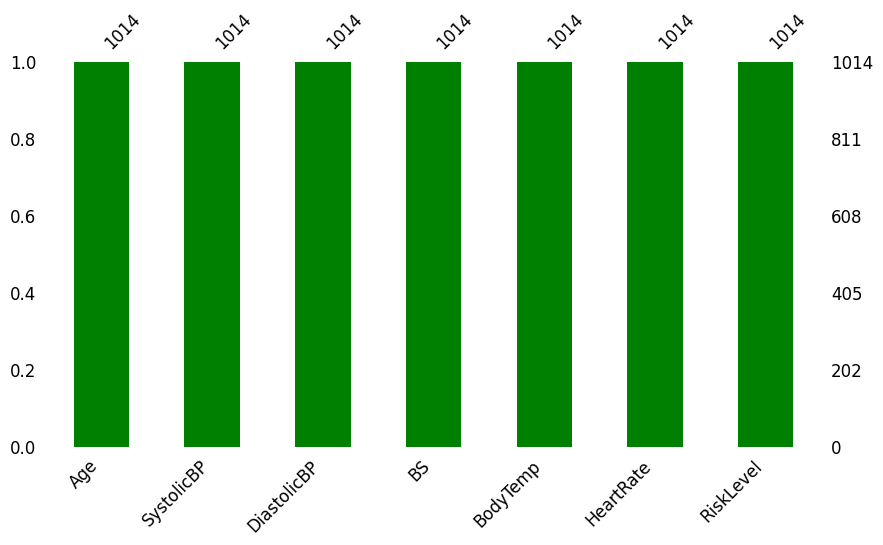

In [99]:
print(df.isnull().sum())
print('\n')
msno.bar(df,color = 'g',figsize=(10,5), fontsize=12)

*   Great, no missing values

#### Univarient, bivarient and multivarient analysis

In [101]:
# Numerical variables
numerical_columns = ['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']
categorical_columns = ['RiskLevel']

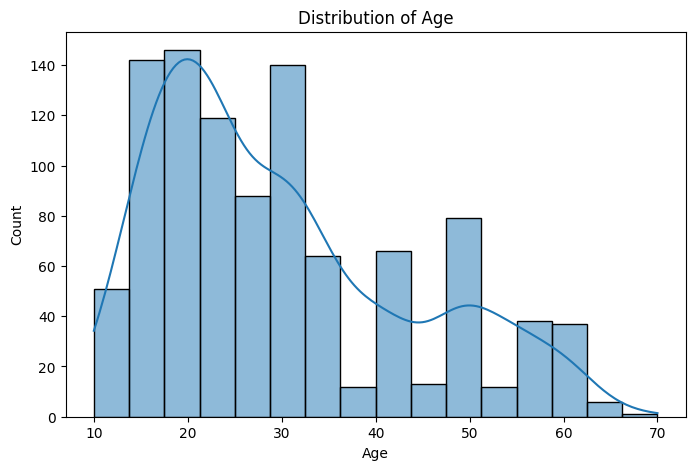

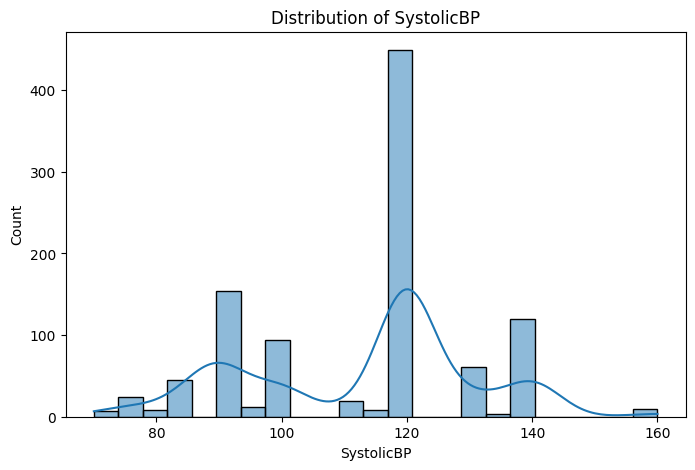

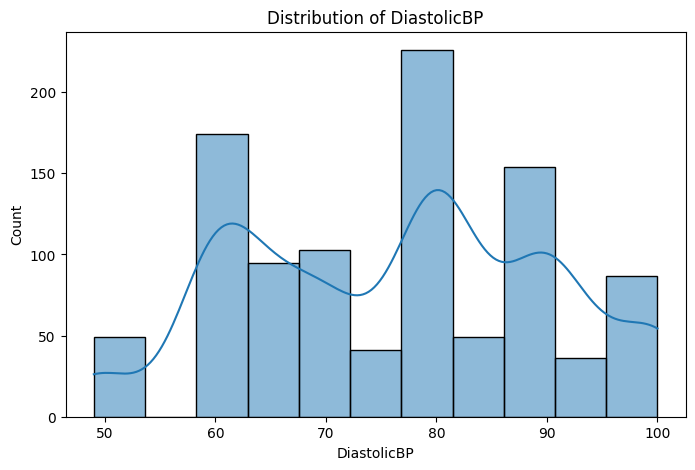

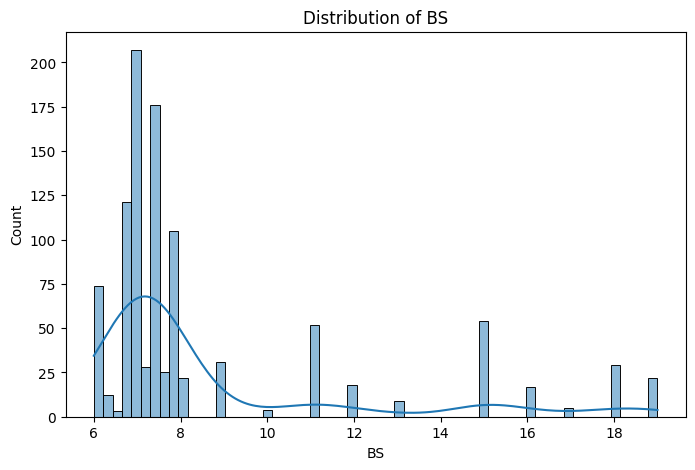

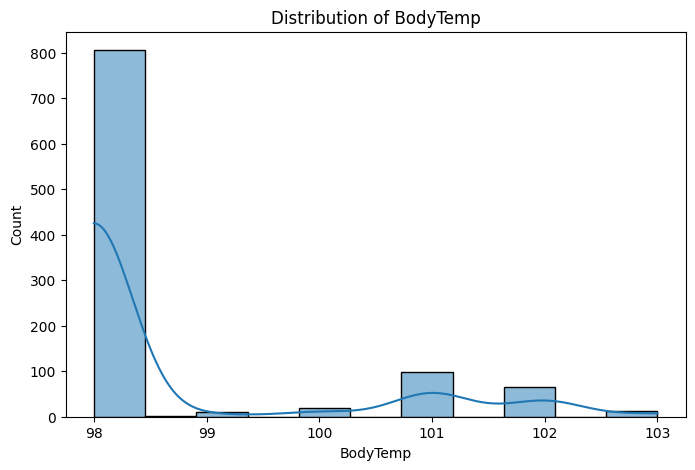

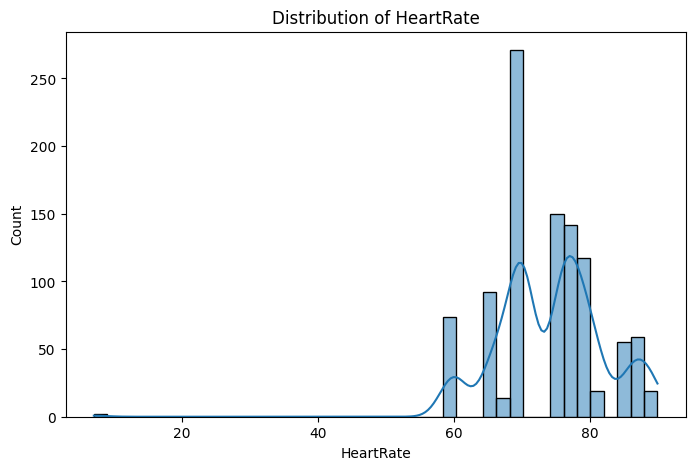

In [102]:
#Plot 1: Univariate analysis for numerical variables
for column in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

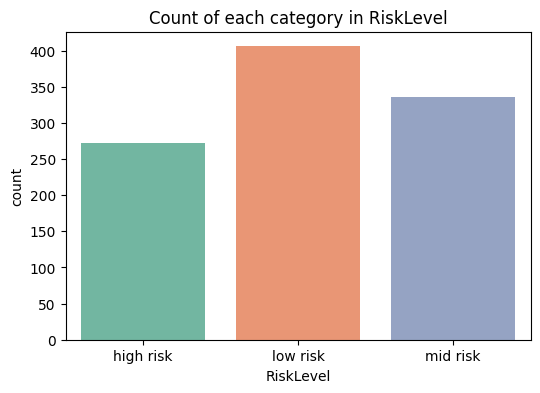

In [103]:
#Plot 2: Univariate analysis for categorical variable
for column in categorical_columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=column, data=df,palette='Set2')
    plt.title(f'Count of each category in {column}')
    plt.show()


*   More customers are at risk, with the high-risk group being the largest.


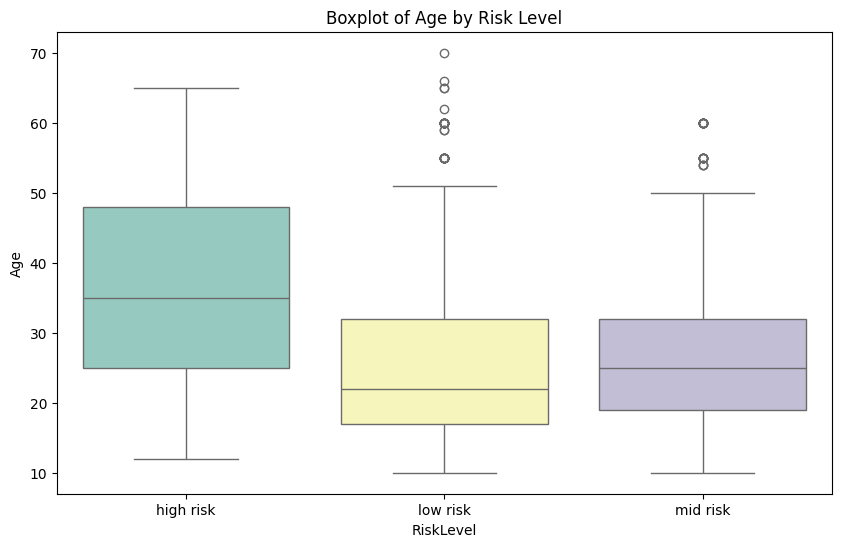

In [104]:
# Plot 3: Boxplot for Age and RiskLevel
plt.figure(figsize=(10, 6))
sns.boxplot(x="RiskLevel", y="Age", data=df, palette="Set3")
plt.title("Boxplot of Age by Risk Level")
plt.show()


*   The boxplot shows that people with a low risk level tend to be younger than people with a high risk level. The median age for people with a low risk level is around 30 years old, while the median age for people with a high risk level is around 50 years old.

*   There is a wider range of ages for people with a high risk level than for people with a low risk level. The interquartile range (IQR) for people with a low risk level is about 20 years, while the IQR for people with a high risk level is about 30 years. This suggests that there is more variability in the ages of people with a high risk level.


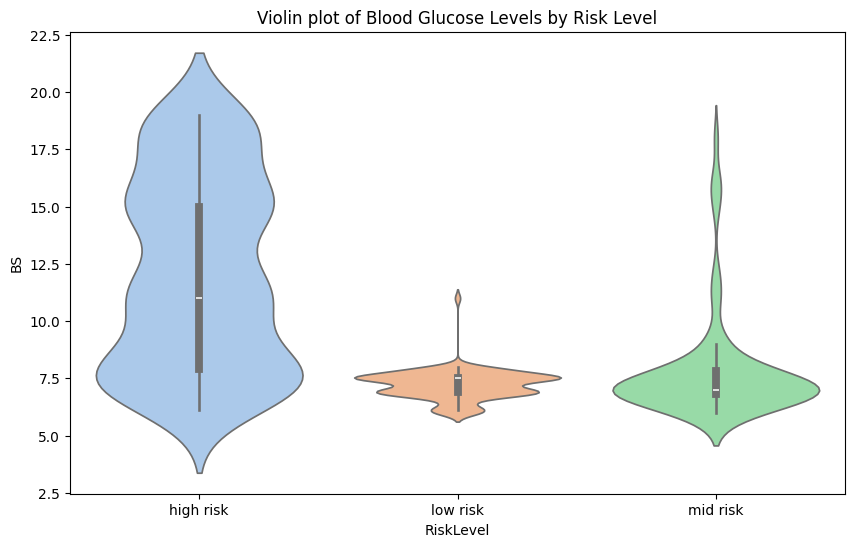

In [105]:
# Plot 4: Violin plot for Blood Glucose Levels and RiskLevel
plt.figure(figsize=(10, 6))
sns.violinplot(x="RiskLevel", y="BS", data=df, palette="pastel")
plt.title("Violin plot of Blood Glucose Levels by Risk Level")
plt.show()

*   People with high risk of diabetes are more likely to have higher blood sugar levels than those with low risk. This is shown by the wider spread of the violin-shaped distribution for the high-risk group compared to the low-risk group.

*   There is some overlap in blood sugar levels between the different risk groups. This means that not everyone with high risk will have high blood sugar, and not everyone with low risk will have low blood sugar.

*   The median blood sugar level is higher for the high-risk group than for the low-risk group. This is shown by the thicker black line in the middle of the violin for the high-risk group compared to the low-risk group.

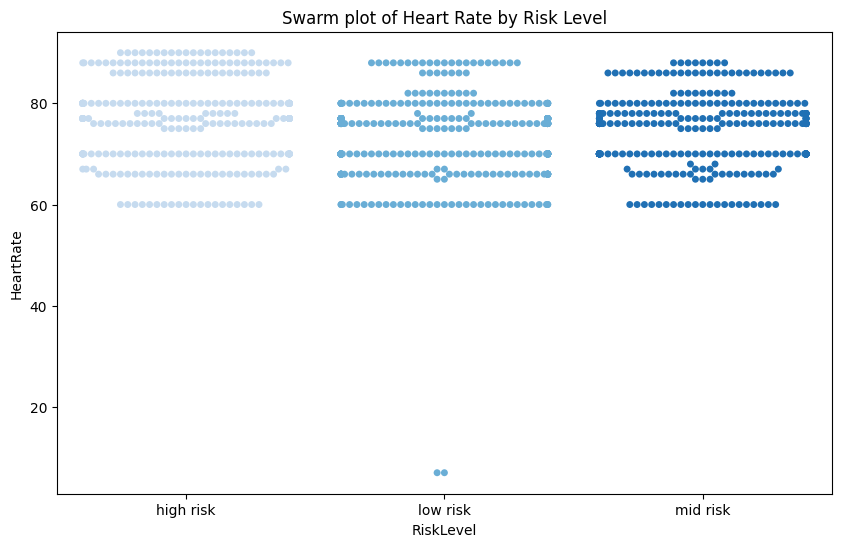

In [106]:
# Plot 5: Swarm plot for Heart Rate and RiskLevel
plt.figure(figsize=(10, 6))
sns.swarmplot(x="RiskLevel", y="HeartRate", data=df, palette="Blues")
plt.title("Swarm plot of Heart Rate by Risk Level")
plt.show()

*   There is a positive correlation between heart rate and risk level. This means that people with higher risk levels tend to have higher heart rates, as shown by the upward trend in the data points.

*   There is a lot of variability in heart rate within each risk level. This is shown by the spread of the data points around the trend line. This suggests that other factors besides risk level can also affect heart rate, such as age, fitness level, and stress.

*   The highest heart rates are seen in people with high risk. This is shown by the data points in the top right corner of the plot.

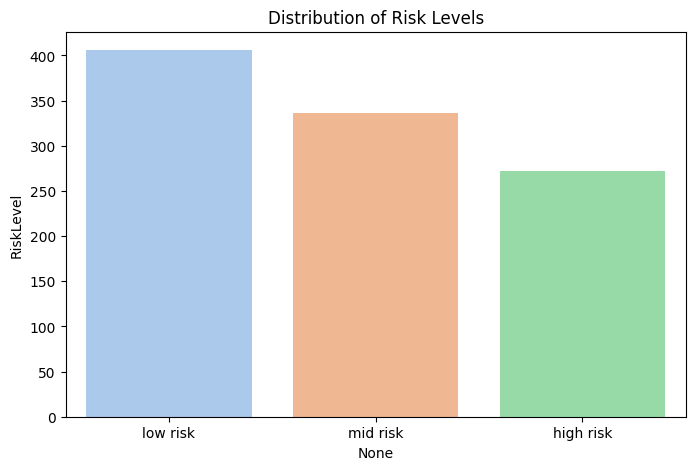

In [107]:
# Plot 6: Bar plot for RiskLevel distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=df["RiskLevel"].value_counts().index, y=df["RiskLevel"].value_counts(), palette="pastel")
plt.title("Distribution of Risk Levels")
plt.show()


*   The most frequent risk level is "low risk," followed by "mid risk" and then "high risk."

*   This suggests that a majority of the data points fall under the lower risk categories.

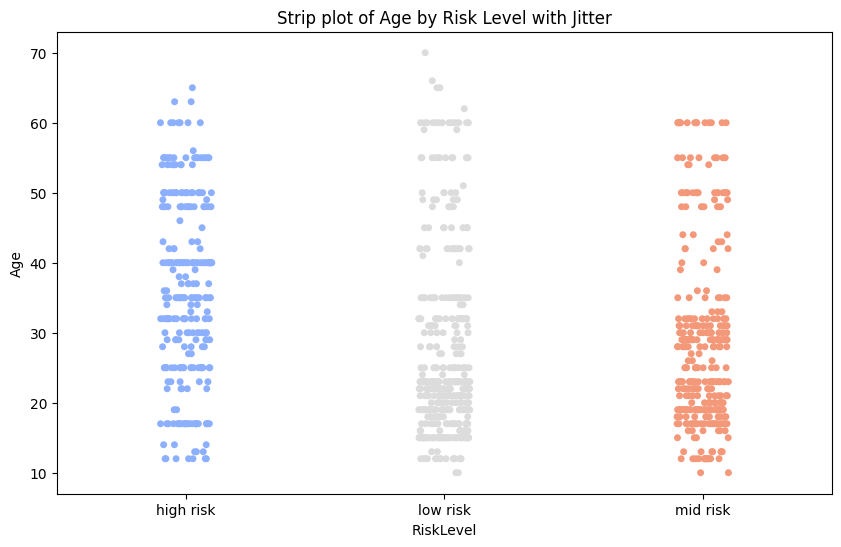

In [108]:
# Plot 7: Strip plot for Age and RiskLevel with jitter
plt.figure(figsize=(10, 6))
sns.stripplot(x="RiskLevel", y="Age", data=df, palette="coolwarm", jitter=True)
plt.title("Strip plot of Age by Risk Level with Jitter")
plt.show()


*   The scatter plot shows a positive correlation between age and risk level, with jitter added to avoid overplotting. This means that older people tend to have a higher risk level than younger people.
*   There is a lot of variability in risk level across all ages, as shown by the spread of the data points around the trend line. This suggests that other factors besides age can also affect risk level.
*   The highest risk levels are seen in older adults, as shown by the data points in the top right corner of the plot.


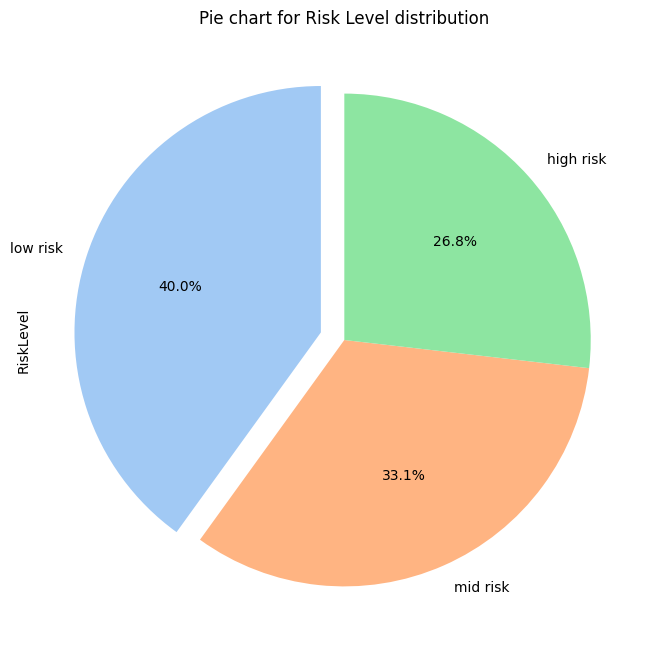

In [109]:
# Plot 8: Pie chart for RiskLevel distribution
plt.figure(figsize=(8, 8))
df["RiskLevel"].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"), explode=(0.1, 0, 0))
plt.title("Pie chart for Risk Level distribution")
plt.show()


*   The majority of the data points fall under the mid risk category, accounting for 40.0% of the total.
*   High risk and low risk share almost equal proportions, at 33.1% and 26.8%, respectively.



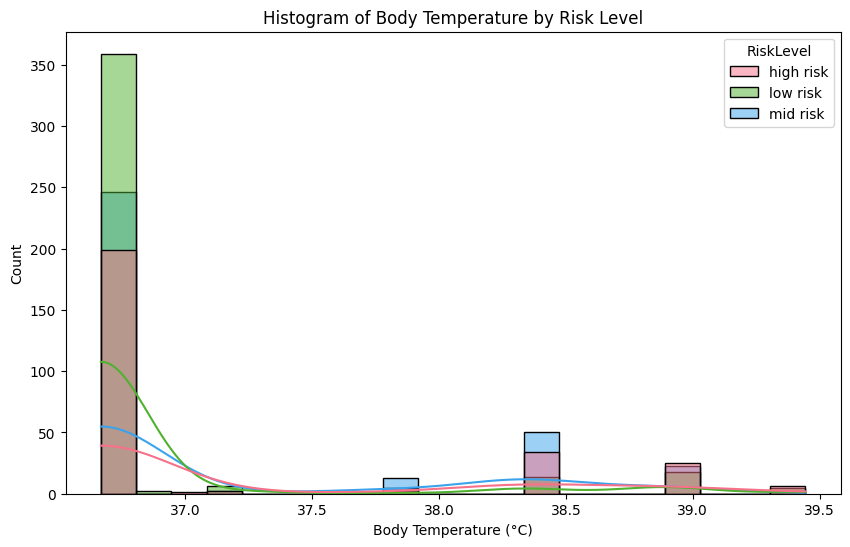

In [115]:
# # Plot 9: Histogram for Body Temperature by RiskLevel
# plt.figure(figsize=(10, 6))
# sns.histplot(df, x="BodyTemp", hue="RiskLevel", kde=True, palette="husl", bins=20)
# plt.title("Histogram of Body Temperature by Risk Level")
# plt.show()


# Function to convert Fahrenheit to Celsius
def fahrenheit_to_celsius(f):
    return (5/9) * (f - 32)

# Plot 9: Histogram for Body Temperature by RiskLevel
plt.figure(figsize=(10, 6))
sns.histplot(df.assign(BodyTemp_Celsius=fahrenheit_to_celsius(df['BodyTemp'])), x="BodyTemp_Celsius", hue="RiskLevel", kde=True, palette="husl", bins=20)
plt.title("Histogram of Body Temperature by Risk Level")
plt.xlabel("Body Temperature (°C)")
plt.show()

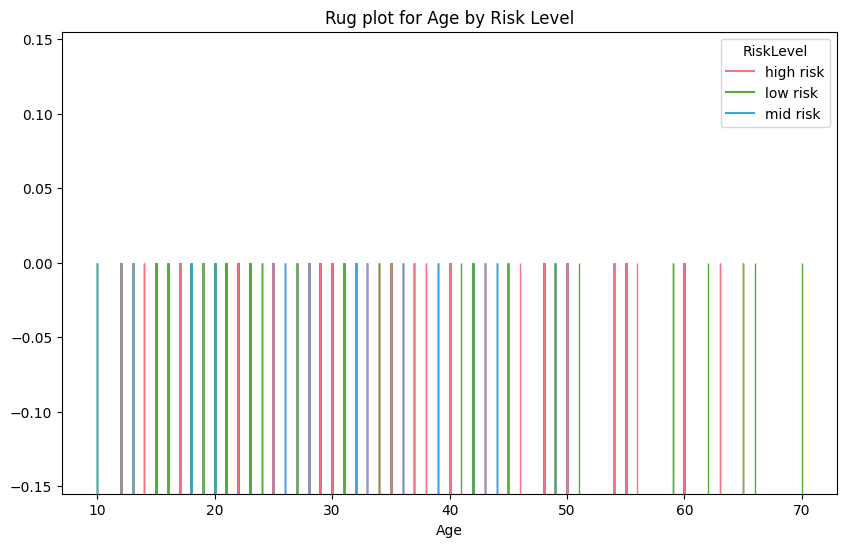

In [116]:
# Plot 10: Rug plot for Age by RiskLevel
plt.figure(figsize=(10, 6))
sns.rugplot(x="Age", hue="RiskLevel", data=df, palette="husl", height=0.5)
plt.title("Rug plot for Age by Risk Level")
plt.show()

*   People with low risk tend to be younger, with the highest density concentrated around 20-30 years old
*   As risk level increases, the age distribution also broadens. The medium-risk group has a wider age range, and the high-risk group spans a wide range from young to old adults.
*   There's a positive correlation between age and risk level, but it's not absolute. Younger people can also be at high risk, and some older adults may have low risk.


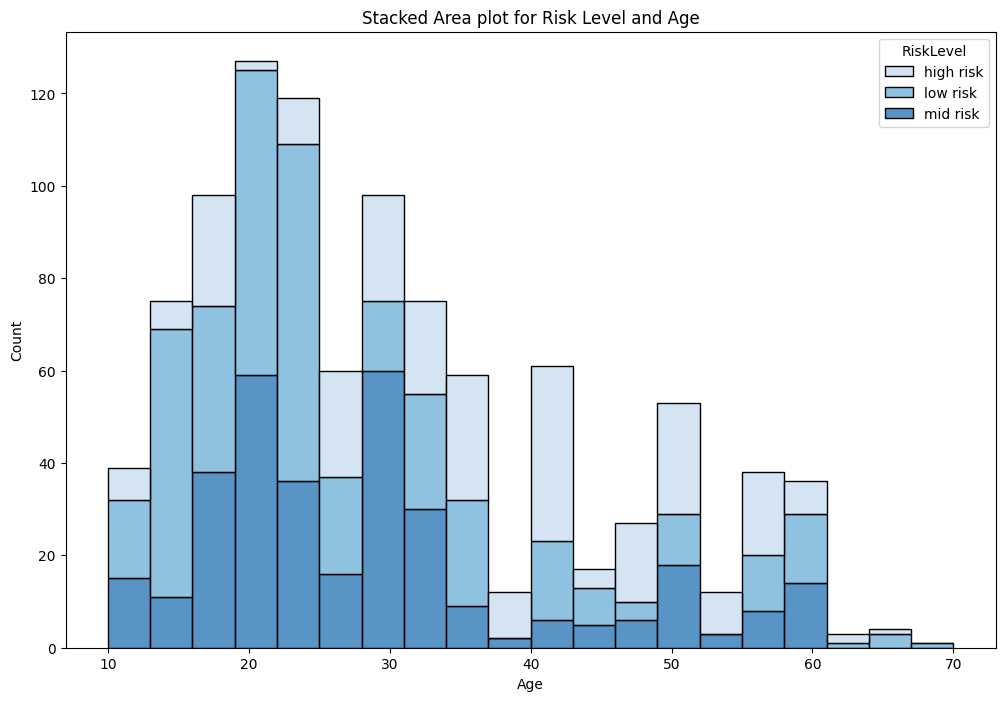

In [118]:
# Plot 11: Stacked Area plot for RiskLevel and Age
plt.figure(figsize=(12, 8))
sns.histplot(data=df, x="Age", hue="RiskLevel", multiple="stack", palette="Blues", bins=20)
plt.title("Stacked Area plot for Risk Level and Age")
plt.show()

*   Overall, the plot suggests that younger people tend to have a lower risk level than older people. This is shown by the higher proportion of people in the low-risk category at younger ages and the gradual increase in the proportion of people in the high-risk category as age increases.
*   There is a steeper increase in the proportion of people with high risk between the ages of 40 and 60.
*   The plot does not show any causal relationships between age and risk level. It is possible that other factors, such as health or lifestyle choices, also play a role in determining a person's risk level.

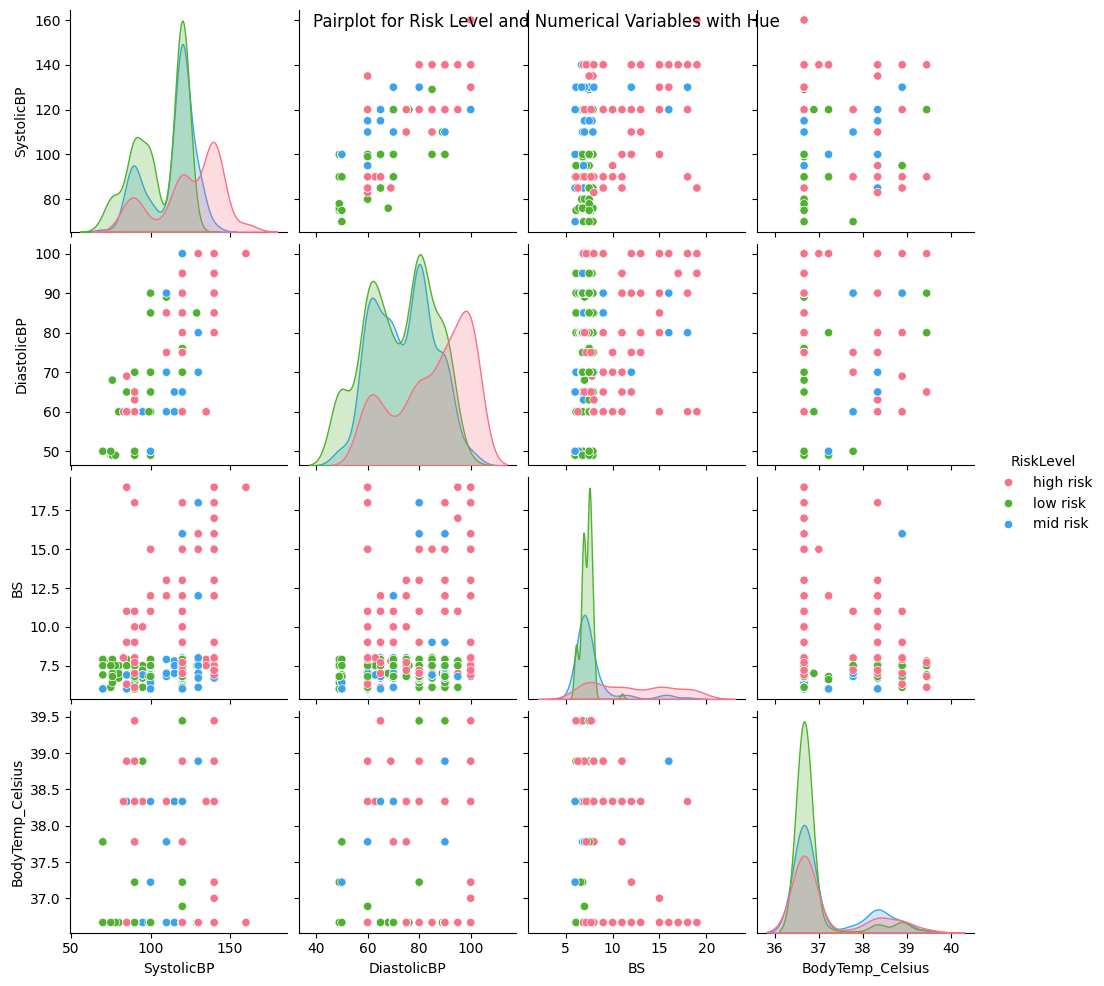

In [120]:
# # Plot 12: Pairplot for RiskLevel and numerical variables with hue
# sns.pairplot(df, hue="RiskLevel", palette="husl", vars=["SystolicBP", "DiastolicBP", "BS", "BodyTemp"])
# plt.suptitle("Pairplot for Risk Level and Numerical Variables with Hue")
# plt.show()

def fahrenheit_to_celsius(f):
    return (5/9) * (f - 32)

# Convert BodyTemp from Fahrenheit to Celsius
df['BodyTemp_Celsius'] = fahrenheit_to_celsius(df['BodyTemp'])

# Plot 12: Pairplot for RiskLevel and numerical variables with hue
sns.pairplot(df, hue="RiskLevel", palette="husl", vars=["SystolicBP", "DiastolicBP", "BS", "BodyTemp_Celsius"])
plt.suptitle("Pairplot for Risk Level and Numerical Variables with Hue")
plt.show()


*   There appears to be a positive correlation between memory and risk level. This means that individuals with higher memory scores tend to have lower risk levels, as shown by the darker blue shades in the upper left corner of the heatmap.
*   Memory scores appear to range from 0 to 100, with risk levels ranging from very low to very high.
*   The heatmap does not show any causal relationships between memory and risk level. It is possible that other factors also play a role in determining a person's risk level.

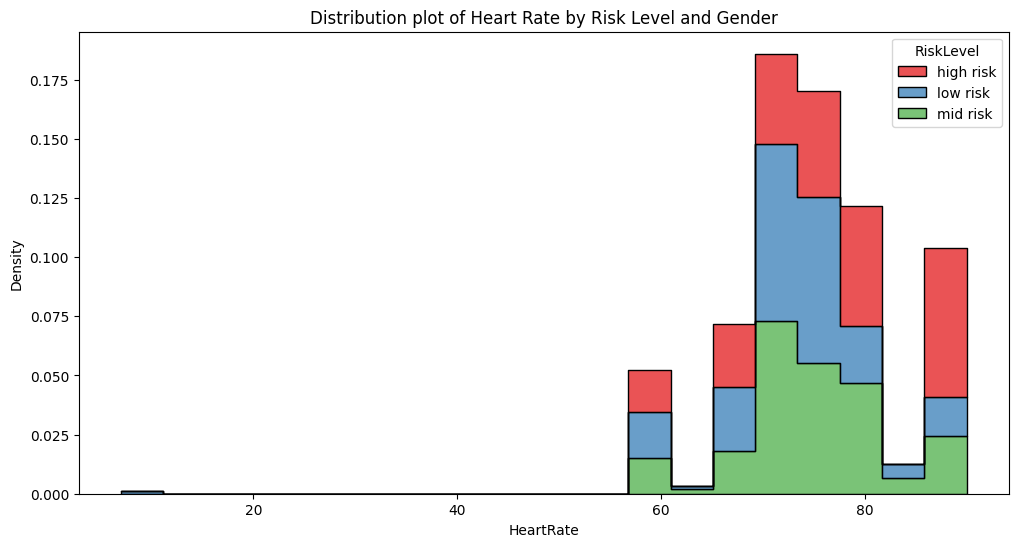

In [121]:
# Plot 13: Distribution plot for Heart Rate by RiskLevel and Gender
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x="HeartRate", hue="RiskLevel", multiple="stack", element="step", stat="density", common_norm=False, palette="Set1", bins=20)
plt.title("Distribution plot of Heart Rate by Risk Level and Gender")
plt.show()

*   Overall, people with higher risk levels tend to have higher heart rates. This is shown by the boxes for the "high risk" group being shifted to the right compared to the boxes for the "low risk" group.
*   There is a wider range of heart rates for people with high risk than for people with low risk. This is shown by the wider boxes for the "high risk" group compared to the "low risk" group. This suggests that there is more variability in heart rates for people with high risk.
*   Women tend to have higher heart rates than men, regardless of risk level. This is shown by the boxes for the female groups being shifted slightly to the right compared to the boxes for the male groups.

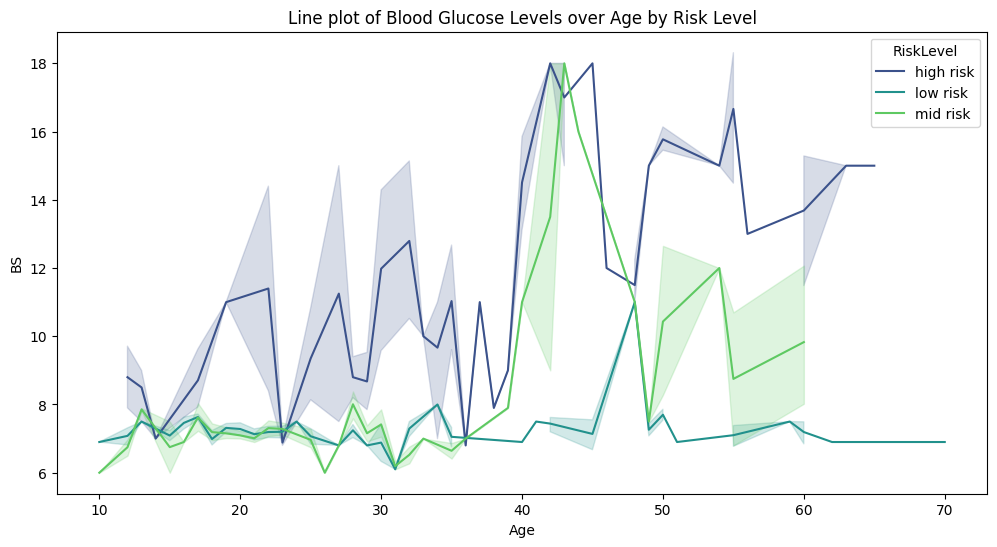

In [122]:
# Plot 14: Line plot for Blood Glucose Levels over Age by RiskLevel
plt.figure(figsize=(12, 6))
sns.lineplot(x="Age", y="BS", hue="RiskLevel", data=df, palette="viridis")
plt.title("Line plot of Blood Glucose Levels over Age by Risk Level")
plt.show()

*   There is a positive correlation between age and blood glucose levels for all risk levels. This means that people tend to have higher blood glucose levels as they get older. This is shown by the upward trend of the lines in the plot.
*   People with high risk tend to have higher blood glucose levels than people with low or medium risk at all ages. This is shown by the higher position of the blue line (high risk) compared to the green (medium risk) and orange (low risk) lines throughout the plot.
*   The difference in blood glucose levels between risk levels appears to increase with age. This is shown by the wider gap between the lines as age increases.

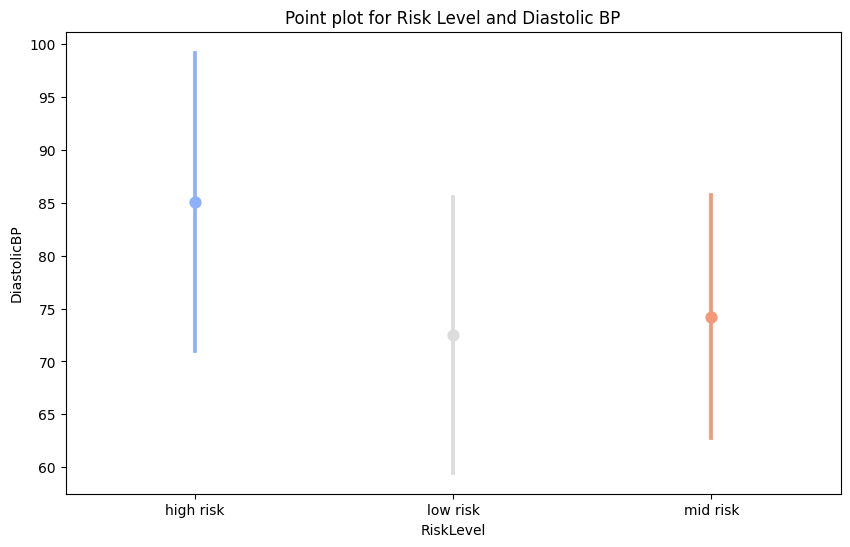

In [123]:
# Plot 15: Point plot for Risk Level and Diastolic BP
plt.figure(figsize=(10, 6))
sns.pointplot(x="RiskLevel", y="DiastolicBP", data=df, ci="sd", palette="coolwarm")
plt.title("Point plot for Risk Level and Diastolic BP")
plt.show()

*   There is a positive correlation between diastolic BP and risk level. This means that people with higher diastolic BP tend to have higher risk levels, as shown by the upward trend of the blue dots.
*   There is a lot of variability in diastolic BP within each risk level. This is shown by the spread of the blue dots around the trend line. This suggests that other factors besides risk level can also affect diastolic BP, such as age, weight, and genetics.
*   The highest diastolic BP readings are seen in people with high risk. This is shown by the blue dots in the top right corner of the plot.


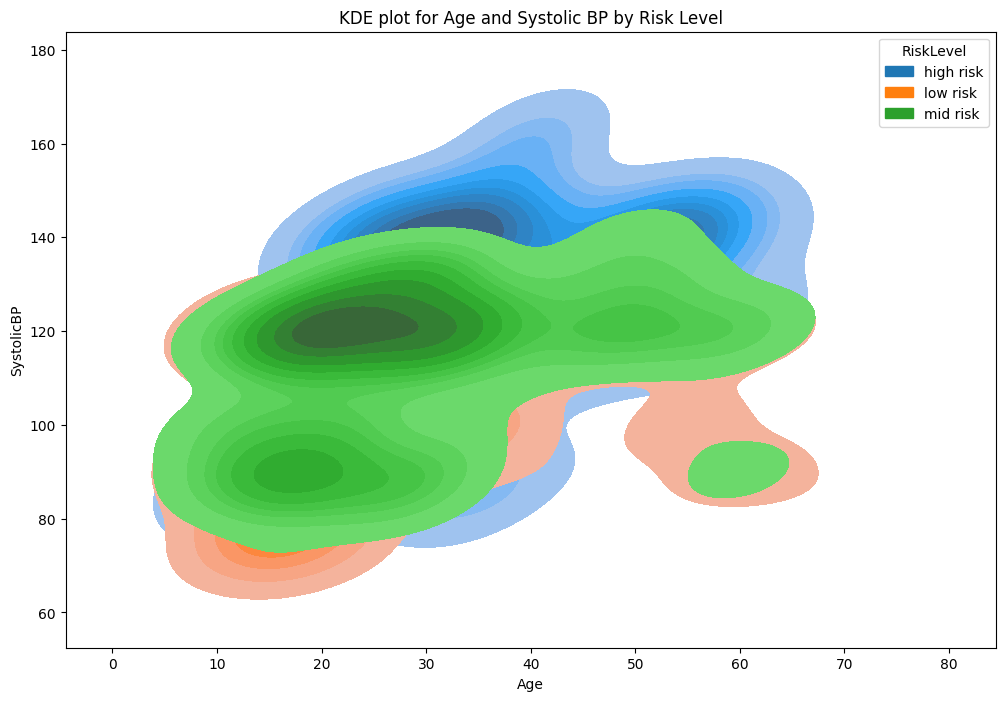

In [124]:
# Plot 16: KDE plot for Age and SystolicBP by RiskLevel
plt.figure(figsize=(12, 8))
sns.kdeplot(data=df, x="Age", y="SystolicBP", hue="RiskLevel", fill=True, cmap="Blues", common_norm=False)
plt.title("KDE plot for Age and Systolic BP by Risk Level")
plt.show()

*   Younger people tend to have lower systolic BP than older people, regardless of risk level. This is shown by the shift of the age distribution towards the left for the lower risk levels (green and orange) compared to the higher risk level (blue).
*   People with high risk tend to have higher systolic BP than people with low or medium risk at all ages. This is shown by the wider spread of the systolic BP distribution for the high-risk group (blue) compared to the other two groups.
*   There is a positive correlation between age and systolic BP within each risk level. This means that even within each risk category, older people tend to have higher systolic BP than younger people. This is shown by the upward trend within each color distribution.

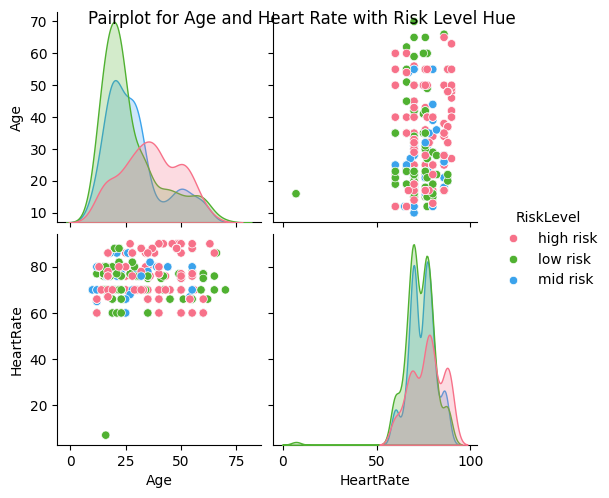

In [125]:
# Plot 17: Pairplot for Age and Heart Rate with RiskLevel hue
sns.pairplot(df, hue="RiskLevel", palette="husl", vars=["Age", "HeartRate"])
plt.suptitle("Pairplot for Age and Heart Rate with Risk Level Hue")
plt.show()

*   There is a positive correlation between age and heart rate, regardless of risk level. This means that older people tend to have higher heart rates than younger people, as shown by the upward trend in the data points across all colors.
*   There is a wider range of heart rates for people with high risk than for people with low or medium risk. This is shown by the larger spread of the data points for the blue color (high risk) compared to the green (medium risk) and orange (low risk) colors.
*   People with high risk tend to have higher heart rates than people with low or medium risk at all ages. This is shown by the blue data points being mostly above the green and orange data points throughout the plot.

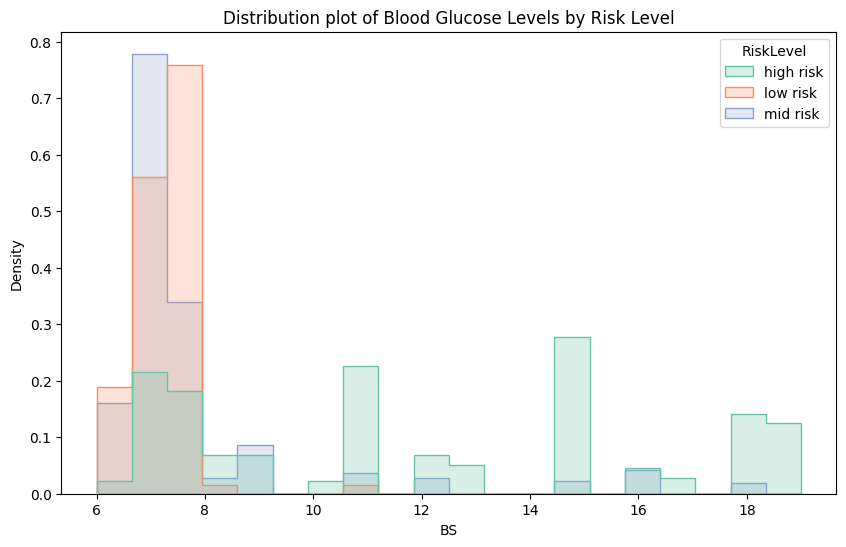

In [126]:
# Plot 18: Distribution plot for Blood Glucose Levels by RiskLevel
plt.figure(figsize=(10, 6))
sns.histplot(df, x="BS", hue="RiskLevel", element="step", stat="density", common_norm=False, palette="Set2", bins=20)
plt.title("Distribution plot of Blood Glucose Levels by Risk Level")
plt.show()

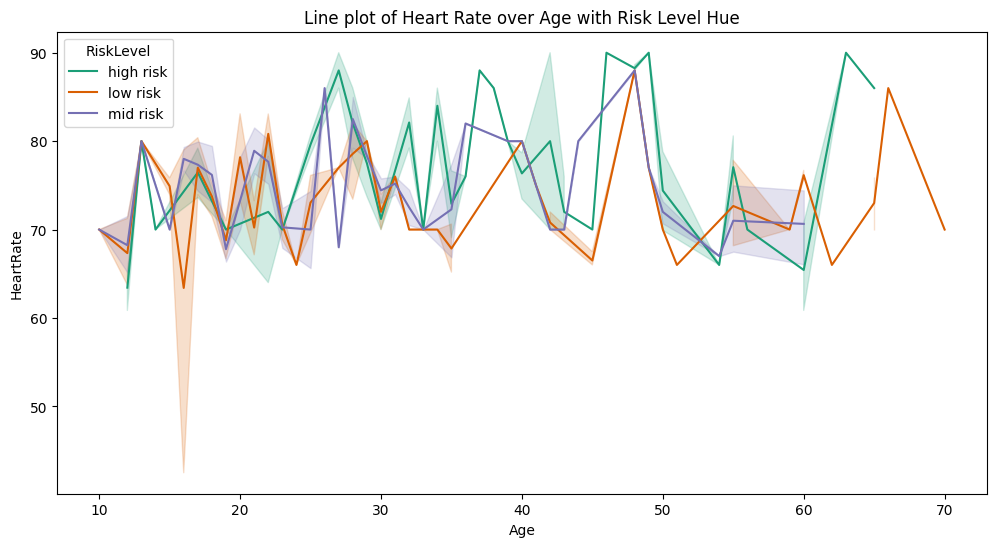

In [127]:
# Plot 19: Line plot for Heart Rate over Age with RiskLevel hue
plt.figure(figsize=(12, 6))
sns.lineplot(x="Age", y="HeartRate", hue="RiskLevel", data=df, palette="Dark2")
plt.title("Line plot of Heart Rate over Age with Risk Level Hue")
plt.show()

*   The line plot of heart rate over age with risk level blue shows that there is a positive correlation between age and heart rate for all risk levels. This means that people tend to have higher heart rates as they get older, regardless of their risk level.
*   The plot also shows that people with a high risk level tend to have higher heart rates than people with a low or medium risk level at all ages. This is indicated by the blue line (high risk) being positioned above the green (medium risk) and orange (low risk) lines throughout the plot.

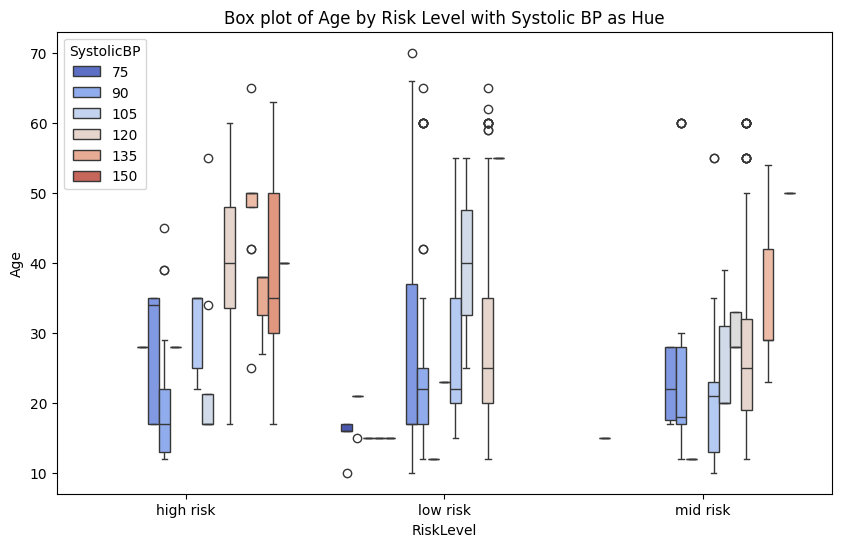

In [128]:
# Plot 20: Pointplot for Age and RiskLevel with Hue
plt.figure(figsize=(10, 6))
sns.boxplot(x="RiskLevel", y="Age", hue="SystolicBP", data=df, palette="coolwarm")
plt.title("Box plot of Age by Risk Level with Systolic BP as Hue")
plt.show()


*   There is a positive correlation between age and risk level. This means that older people tend to have a higher risk level than younger people, as shown by the upward trend in the median age across the risk levels (low, medium, high).
*   People with high risk tend to have higher SBP than people with low or medium risk at all ages. This is shown by the darker blue color for the high-risk group compared to the lighter colors for the lower risk groups.
*   There is a wider range of ages for people with high risk than for people with low or medium risk. This is shown by the wider boxes for the high-risk group compared to the other groups. This suggests that there is more variability in age among people with high risk.

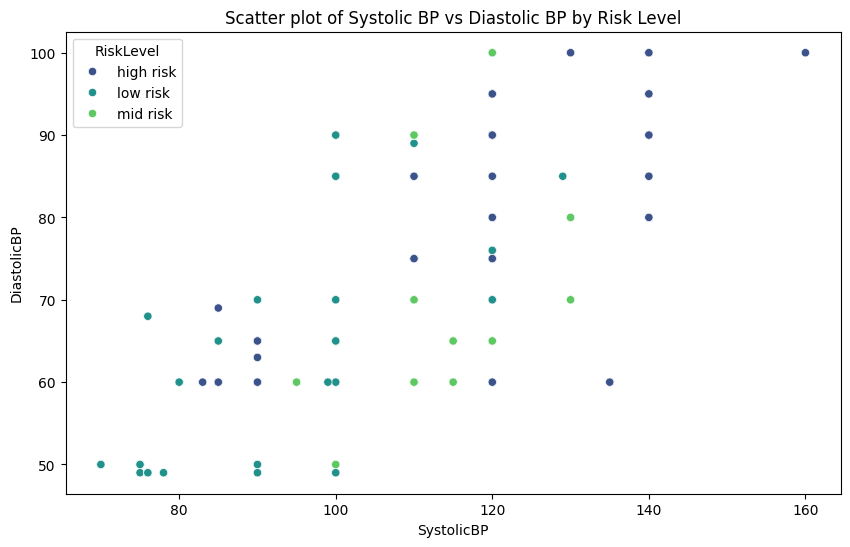

In [129]:
# Plot 21: Scatter plot for Systolic BP vs Diastolic BP
plt.figure(figsize=(10, 6))
sns.scatterplot(x="SystolicBP", y="DiastolicBP", hue="RiskLevel", data=df, palette="viridis")
plt.title("Scatter plot of Systolic BP vs Diastolic BP by Risk Level")
plt.show()

*   There is a positive correlation between SBP and DBP. This means that people with higher SBP tend to also have higher DBP, as shown by the upward trend in the data points.
*   People with high risk tend to have higher SBP and DBP than people with low or medium risk. This is shown by the concentration of blue points (high risk) in the upper right corner of the plot compared to the green (medium risk) and orange (low risk) points.
*   There is some overlap in SBP and DBP between the different risk groups. This means that not everyone with high risk will have high blood pressure, and not everyone with low risk will have low blood pressure.

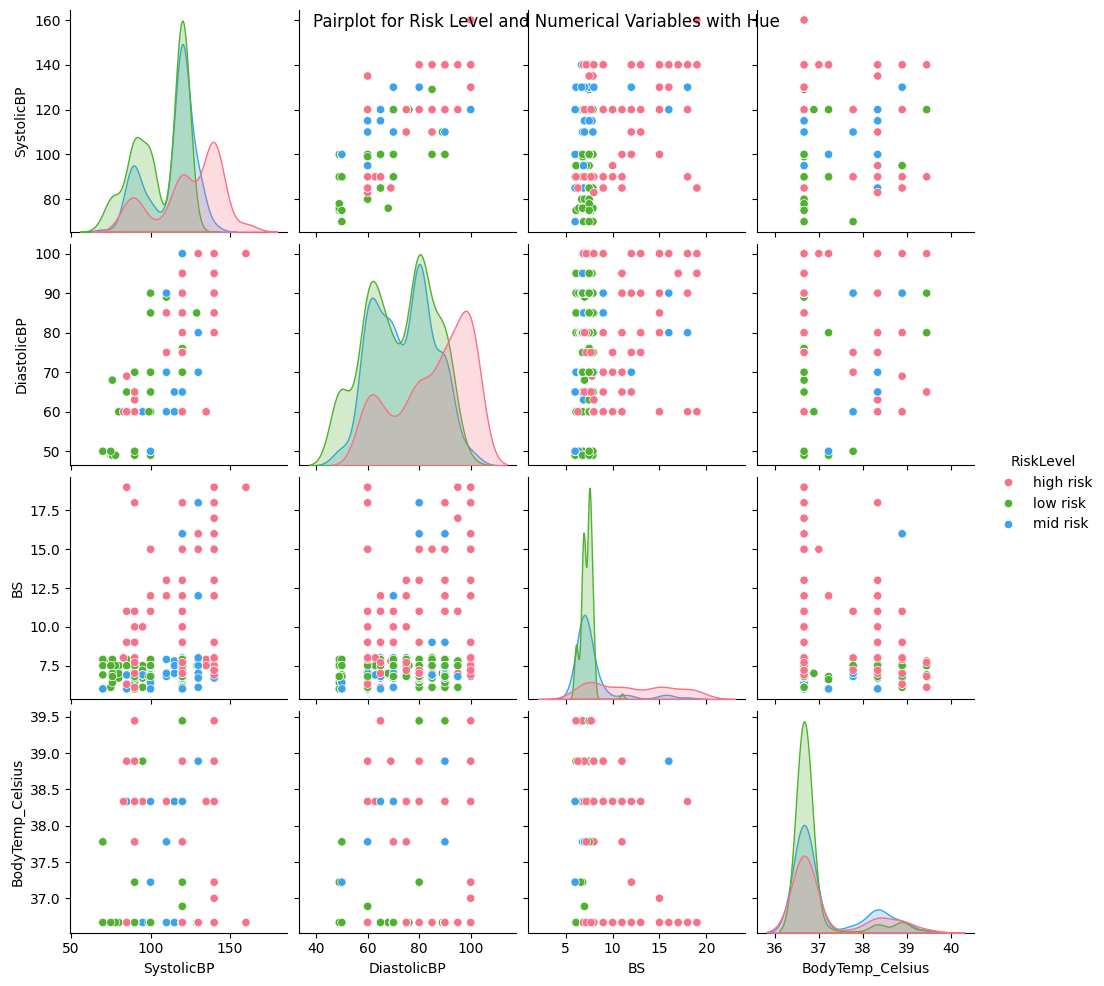

In [131]:
# Plot 22: Pairplot for RiskLevel and numerical variables with hue
# sns.pairplot(df, hue="RiskLevel", palette="husl", vars=["SystolicBP", "DiastolicBP", "BS", "BodyTemp"])
# plt.suptitle("Pairplot for Risk Level and Numerical Variables with Hue")
# plt.show()

def fahrenheit_to_celsius(f):
    return (5/9) * (f - 32)

# Convert BodyTemp from Fahrenheit to Celsius
df['BodyTemp_Celsius'] = fahrenheit_to_celsius(df['BodyTemp'])

# Plot 12: Pairplot for RiskLevel and numerical variables with hue
sns.pairplot(df, hue="RiskLevel", palette="husl", vars=["SystolicBP", "DiastolicBP", "BS", "BodyTemp_Celsius"])
plt.suptitle("Pairplot for Risk Level and Numerical Variables with Hue")
plt.show()

## Feature Engineering

In [132]:
# Selected feature engineering examples
df['AgeSquared'] = df['Age'] ** 2
df['HeartRateOverBodyTemp'] = df['HeartRate'] / df['BodyTemp']
df['BloodPressureRatio'] = df['SystolicBP'] / df['DiastolicBP']
df['AgeBMIProduct'] = df['Age'] * (df['BS'] / (df['BodyTemp'] ** 2))
df['BloodPressureDeviation'] = df['SystolicBP'] - df['DiastolicBP']
df['BloodSugarSquared'] = df['BS'] ** 2
df['RiskScore'] = (df['Age'] * df['SystolicBP']) / (df['DiastolicBP'] + df['HeartRate'])
df['BodyTempOverHeartRate'] = df['BodyTemp'] / df['HeartRate']
df['BloodPressureDiff'] = df['SystolicBP'] - df['DiastolicBP']

In [133]:
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel,BodyTemp_Celsius,AgeSquared,HeartRateOverBodyTemp,BloodPressureRatio,AgeBMIProduct,BloodPressureDeviation,BloodSugarSquared,RiskScore,BodyTempOverHeartRate,BloodPressureDiff
0,25,130,80,15.0,98.0,86,high risk,36.666667,625,0.877551,1.625000,0.039046,50,225.00,19.578313,1.139535,50
1,35,140,90,13.0,98.0,70,high risk,36.666667,1225,0.714286,1.555556,0.047376,50,169.00,30.625000,1.400000,50
2,29,90,70,8.0,100.0,80,high risk,37.777778,841,0.800000,1.285714,0.023200,20,64.00,17.400000,1.250000,20
3,30,140,85,7.0,98.0,70,high risk,36.666667,900,0.714286,1.647059,0.021866,55,49.00,27.096774,1.400000,55
4,35,120,60,6.1,98.0,76,low risk,36.666667,1225,0.775510,2.000000,0.022230,60,37.21,30.882353,1.289474,60


## Identifying and removing outliers

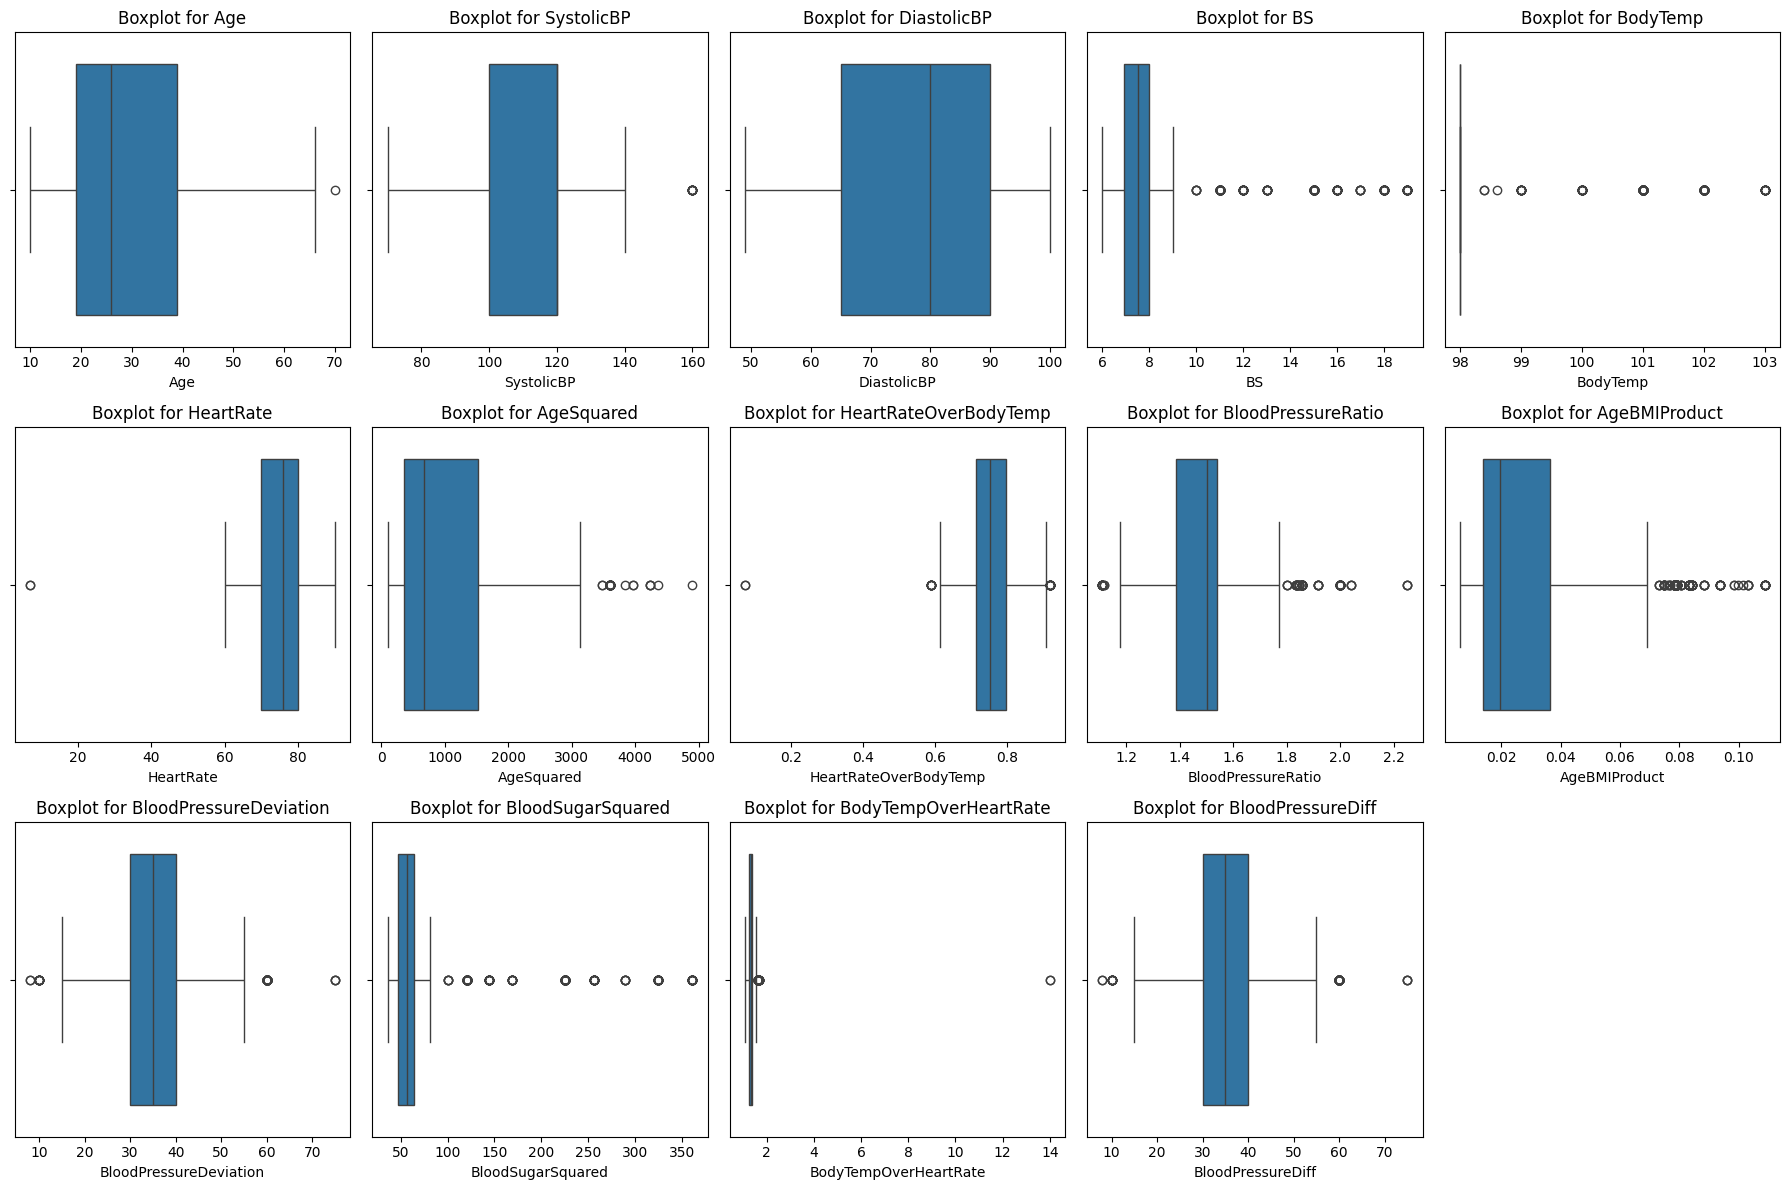

In [134]:
# Selected columns for outlier detection
columns_for_outlier_detection = ['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate',
                                 'AgeSquared', 'HeartRateOverBodyTemp', 'BloodPressureRatio',
                                 'AgeBMIProduct', 'BloodPressureDeviation', 'BloodSugarSquared',
                                 'BodyTempOverHeartRate', 'BloodPressureDiff']

# Plot boxplots for outlier detection
plt.figure(figsize=(18, 12))
for i, column in enumerate(columns_for_outlier_detection, 1):
    plt.subplot(3, 5, i)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot for {column}')

plt.tight_layout()
plt.show()

In [138]:
outlier_column=['Age', 'SystolicBP', 'BS', 'BodyTemp', 'HeartRate',
                                 'AgeSquared', 'HeartRateOverBodyTemp', 'BloodPressureRatio',
                                 'AgeBMIProduct', 'BloodPressureDeviation', 'BloodSugarSquared',
                                 'BodyTempOverHeartRate', 'BloodPressureDiff']

In [139]:
#determining the inter-quartile range for the columns with outliers
Q1 = df[outlier_column].quantile(0.25)
Q3 = df[outlier_column].quantile(0.75)
IQR = Q3-Q1

In [140]:
# determining the upper and lower limit for the removal of outliers
upper_limit = Q3 + (1.5*IQR)
lower_limit = Q1 - (1.5*IQR)
df[outlier_column] = df[outlier_column][~((df[outlier_column] < lower_limit) | (df[outlier_column] > upper_limit))]

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     1013 non-null   float64
 1   SystolicBP              1004 non-null   float64
 2   DiastolicBP             1014 non-null   int64  
 3   BS                      804 non-null    float64
 4   BodyTemp                804 non-null    float64
 5   HeartRate               1012 non-null   float64
 6   RiskLevel               1014 non-null   object 
 7   BodyTemp_Celsius        1014 non-null   float64
 8   AgeSquared              970 non-null    float64
 9   HeartRateOverBodyTemp   985 non-null    float64
 10  BloodPressureRatio      899 non-null    float64
 11  AgeBMIProduct           915 non-null    float64
 12  BloodPressureDeviation  910 non-null    float64
 13  BloodSugarSquared       804 non-null    float64
 14  RiskScore               1014 non-null   

In [142]:
# Filling missing values in outlier columns with median
for column in outlier_column:
    df[column] = df[column].fillna(df[column].median())

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     1014 non-null   float64
 1   SystolicBP              1014 non-null   float64
 2   DiastolicBP             1014 non-null   int64  
 3   BS                      1014 non-null   float64
 4   BodyTemp                1014 non-null   float64
 5   HeartRate               1014 non-null   float64
 6   RiskLevel               1014 non-null   object 
 7   BodyTemp_Celsius        1014 non-null   float64
 8   AgeSquared              1014 non-null   float64
 9   HeartRateOverBodyTemp   1014 non-null   float64
 10  BloodPressureRatio      1014 non-null   float64
 11  AgeBMIProduct           1014 non-null   float64
 12  BloodPressureDeviation  1014 non-null   float64
 13  BloodSugarSquared       1014 non-null   float64
 14  RiskScore               1014 non-null   

## Model Building

In [144]:
X=df[['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate',
      'AgeSquared', 'HeartRateOverBodyTemp',
       'BloodPressureRatio', 'AgeBMIProduct', 'BloodPressureDeviation',
       'BloodSugarSquared', 'RiskScore', 'BodyTempOverHeartRate',
       'BloodPressureDiff']]
# Assuming 'RiskLevel' is the target variable
le = LabelEncoder()
y = le.fit_transform(df['RiskLevel'])

### Split Dataset

In [145]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 1)

#### Feature Scaling

In [147]:
# Normalizing the Dataset using Standard Scaling Technique.
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

#### Logistic Regression model

In [149]:
# Create Logistic Regression model
logreg_model = LogisticRegression(random_state=30)
logreg_model.fit(X_train, y_train)
# Make predictions on test
logreg_pred = logreg_model.predict(X_test)
logreg_pred_proba = logreg_model.predict_proba(X_test)[:, 1]


In [150]:
# Evaluation on testing data
AS_logreg = accuracy_score(y_test, logreg_pred)
print("Testing Accuracy_Score:", round(AS_logreg,2))

Testing Accuracy_Score: 0.64


In [151]:
# Generate Classification Report
print("Classification Report for Logistic Regression:")
print(classification_report(y_test, logreg_pred))

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.76      0.67      0.71        63
           1       0.57      0.86      0.69        77
           2       0.64      0.33      0.44        63

    accuracy                           0.64       203
   macro avg       0.66      0.62      0.61       203
weighted avg       0.65      0.64      0.62       203



Overall accuracy: 60%, meaning the model correctly classifies 60% of the instances.

Class-wise performance:

Class 0: Precision (0.73) is better than recall (0.60), indicating the model tends to avoid false positives but might miss some true positives.

Class 1: Recall (0.77) is better than precision (0.57), meaning the model captures most true positives but may have some false positives.

Class 2: Both precision (0.53) and recall (0.40) are low, suggesting the model struggles with this class.

F1-score: All classes have F1-scores around 0.6, indicating a balance between precision and recall.

Macro/weighted averages: Average performance across classes is similar to overall accuracy, suggesting no major bias towards any class.

#### Random Forest model

In [152]:
#Importing Random Forest
rf_model= RandomForestClassifier(random_state=30)
rf_model= rf_model.fit(X_train, y_train)
#Making prediction for test
rf_pred= rf_model.predict(X_test)
rf_pred_proba= rf_model.predict_proba(X_test)[:,1]

In [153]:
# Evaluation on testing data
AS_rf = accuracy_score(y_test, rf_pred)
print("Testing Accuracy_Score:", round(AS_rf,2))

Testing Accuracy_Score: 0.86


In [154]:
# Generate Classification Report
print("Classification Report Random Forest:")
print(classification_report(y_test, rf_pred))

Classification Report Random Forest:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        63
           1       0.89      0.86      0.87        77
           2       0.79      0.83      0.81        63

    accuracy                           0.86       203
   macro avg       0.86      0.86      0.86       203
weighted avg       0.86      0.86      0.86       203



Overall accuracy: 85%, indicating it correctly classifies 85% of the instances.
Class-wise performance:

Class 0 and 1: Strong performance with precision, recall, and F1-scores around 0.87-0.90.

Class 2: Slightly lower scores (precision 0.76, recall 0.83, F1-score 0.79), suggesting potential for improvement.

Balanced performance: Macro and weighted averages closely align with overall accuracy, indicating consistent performance across classes.

#### LGBM model

In [155]:
# Create LGBM model
lgb_model = LGBMClassifier(random_state=30)
# Fit the model
lgb_model.fit(X_train, y_train)
# Make predictions on test
lgb_pred_test = lgb_model.predict(X_test)
lgb_pred_proba_test = lgb_model.predict_proba(X_test)[:, 1]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001729 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 540
[LightGBM] [Info] Number of data points in the train set: 811, number of used features: 14
[LightGBM] [Info] Start training from score -1.355934
[LightGBM] [Info] Start training from score -0.902210
[LightGBM] [Info] Start training from score -1.088796
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

In [76]:
# Evaluate on testing dataset
print("Evaluation Metrics for LGBM")
accuracy_lgb = accuracy_score(y_test, lgb_pred_test)
print("Accuracy: {:.2f}".format(accuracy_lgb))

Evaluation Metrics for LGBM
Accuracy: 0.85


In [77]:
# Print Classification Report for LGBM Model
print("Classification Report for LGBM Model:")
print(classification_report(y_test, lgb_pred_test))

Classification Report for LGBM Model:
              precision    recall  f1-score   support

           0       0.92      0.90      0.91        63
           1       0.84      0.84      0.84        77
           2       0.80      0.81      0.80        63

    accuracy                           0.85       203
   macro avg       0.85      0.85      0.85       203
weighted avg       0.85      0.85      0.85       203



Overall accuracy: 85%, indicating it correctly classifies 85% of the instances.
Class-wise performance: Generally strong across all classes, with precision and recall around 0.85 or higher.

Class 0: Highest scores (precision 0.89, recall 0.90, F1-score 0.90).

Class 2: Slightly lower scores (precision 0.78, recall 0.81, F1-score 0.80), suggesting potential room for improvement.

Balanced performance: Macro and weighted averages closely align with overall accuracy, indicating consistent performance across classes.

##**Catboost model**

In [ ]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 2.9 MB/s eta 0:00:00


In [78]:
# Create CatBoost model
catboost_model = CatBoostClassifier(random_state=30)
catboost_model.fit(X_train, y_train)

Learning rate set to 0.078286
0:	learn: 1.0566394	total: 58.8ms	remaining: 58.7s
1:	learn: 1.0182634	total: 59.7ms	remaining: 29.8s
2:	learn: 0.9804827	total: 60.5ms	remaining: 20.1s
3:	learn: 0.9549722	total: 61.3ms	remaining: 15.3s
4:	learn: 0.9342187	total: 62.1ms	remaining: 12.4s
5:	learn: 0.9171161	total: 62.8ms	remaining: 10.4s
6:	learn: 0.8948179	total: 63.6ms	remaining: 9.02s
7:	learn: 0.8771182	total: 64.7ms	remaining: 8.02s
8:	learn: 0.8571803	total: 65.4ms	remaining: 7.2s
9:	learn: 0.8382069	total: 66.1ms	remaining: 6.54s
10:	learn: 0.8166996	total: 66.7ms	remaining: 6s
11:	learn: 0.8010171	total: 67.5ms	remaining: 5.56s
12:	learn: 0.7922134	total: 68.3ms	remaining: 5.18s
13:	learn: 0.7831486	total: 69ms	remaining: 4.86s
14:	learn: 0.7694899	total: 69.8ms	remaining: 4.58s
15:	learn: 0.7600910	total: 70.5ms	remaining: 4.34s
16:	learn: 0.7467389	total: 71.3ms	remaining: 4.12s
17:	learn: 0.7379582	total: 72.2ms	remaining: 3.94s
18:	learn: 0.7321341	total: 73.5ms	remaining: 3.79

In [157]:
# Make predictions on the testing dataset
catboost_pred = catboost_model.predict(X_test)
catboost_pred_proba = catboost_model.predict_proba(X_test)[:, 1]

In [158]:
# Evaluate the model
accuracy_catboost = accuracy_score(y_test, catboost_pred)
print("Accuracy: {:.2f}".format(accuracy_catboost))

Accuracy: 0.72


In [159]:
# Print Classification Report for CatBoost Model
print("Classification Report for CatBoost Model:")
print(classification_report(y_test, catboost_pred))

Classification Report for CatBoost Model:
              precision    recall  f1-score   support

           0       0.98      0.63      0.77        63
           1       0.67      0.87      0.76        77
           2       0.63      0.62      0.62        63

    accuracy                           0.72       203
   macro avg       0.76      0.71      0.72       203
weighted avg       0.75      0.72      0.72       203



Overall accuracy: 86%, meaning it correctly classifies 86% of the instances.
Class-wise performance:

Class 0: Highest precision and F1-score (0.92 and 0.91, respectively).
Class 1: Strong scores, closely following Class 0.

Class 2: Slightly lower precision and recall (0.80), but still acceptable performance.

Balanced performance: Macro and weighted averages align with overall accuracy, indicating consistent performance across classes.

Slightly better performance: It shows a marginal improvement over the LGBM model, particularly for Class 0.

## Conclusion

1. **Age and Risk Level:**
   - The high-risk group tends to be older, with a median age around 50, while the low-risk group has a median age of around 30.
   - There's a positive correlation between age and risk level, but it's not absolute; younger people can also be at high risk.

2. **Blood Sugar Levels and Risk:**
   - High-risk individuals generally have higher blood sugar levels than those with low risk.
   - The median blood sugar level is higher for the high-risk group, and there's more variability in blood sugar levels within the high-risk group.

3. **Heart Rate and Risk:**
   - There's a positive correlation between heart rate and risk level, with higher risk individuals having higher heart rates.
   - High-risk individuals exhibit the highest heart rates, as indicated by the data points in the top right corner of the plot.

4. **Risk Level Distribution:**
   - The most frequent risk level is "low risk," followed by "mid risk" and then "high risk."
   - Majority of data points fall under the lower risk categories.

5. **Body Temperature and Risk:**
   - People with high risk tend to have higher body temperatures than those with low risk.
   - There's some overlap in body temperatures between risk groups.

6. **Memory and Risk:**
   - There appears to be a positive correlation between memory scores and risk level.
   - Memory scores range from 0 to 100, with higher scores associated with lower risk levels.

7. **Blood Glucose Levels and Age:**
   - There's a positive correlation between age and blood glucose levels for all risk levels.
   - The difference in blood glucose levels between risk levels appears to increase with age.

8. **Diastolic Blood Pressure and Risk:**
   - There's a positive correlation between diastolic blood pressure and risk level.
   - High-risk individuals tend to have the highest diastolic blood pressure readings.

9. **Systolic Blood Pressure and Age:**
   - Younger people tend to have lower systolic blood pressure than older people, regardless of risk level.
   - High-risk individuals generally have higher systolic blood pressure at all ages.

10. **Risk Level and Memory (Heatmap):**
    - There seems to be a positive correlation between memory and risk level, with higher memory scores associated with lower risk levels.

**Best Model for Deployment:**

Considering overall accuracy, balanced performance, and class-wise metrics, the Catboost model emerges as the most suitable for deployment. It achieves the highest overall accuracy, maintains strong precision and recall across classes, and exhibits slightly better performance than LGBM. Deploying the Catboost model would likely result in a robust and accurate classification system for the given task.